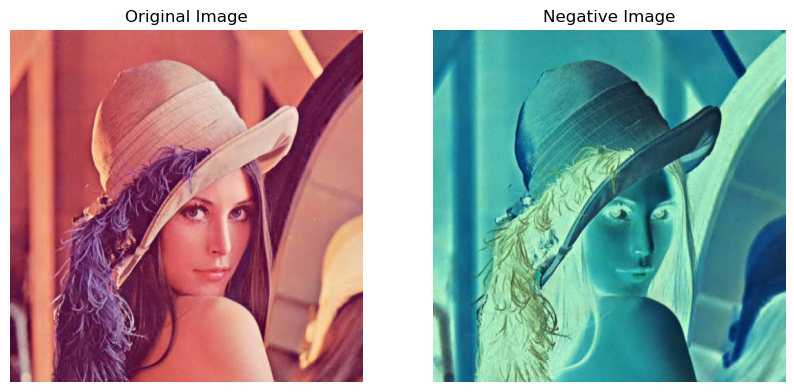

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def convert_to_negative(image_path):
   
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    
    if image is None:
        print("Error: Could not read the image.")
        return
    
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    negative_image = 255 - image_rgb
    
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(image_rgb)
    plt.title("Original Image")
    plt.axis("off")
    
    plt.subplot(1, 2, 2)
    plt.imshow(negative_image)
    plt.title("Negative Image")
    plt.axis("off")
    
    plt.show()
convert_to_negative(r"D:\XKUT9.png")

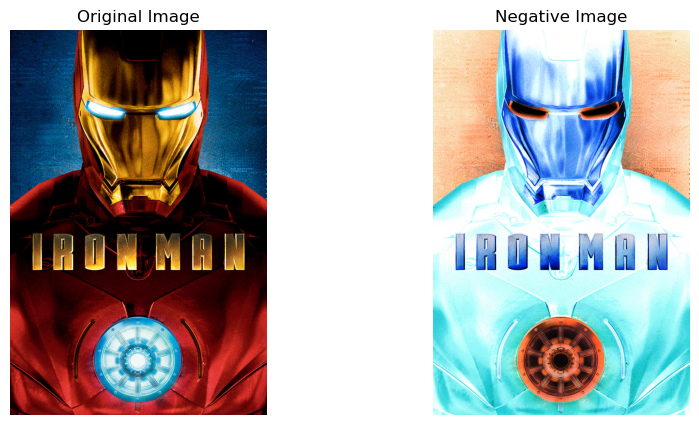

In [2]:
convert_to_negative(r"D:\rYy4MShKrZVXhiG4BLqwW1PeSOT.jpg")

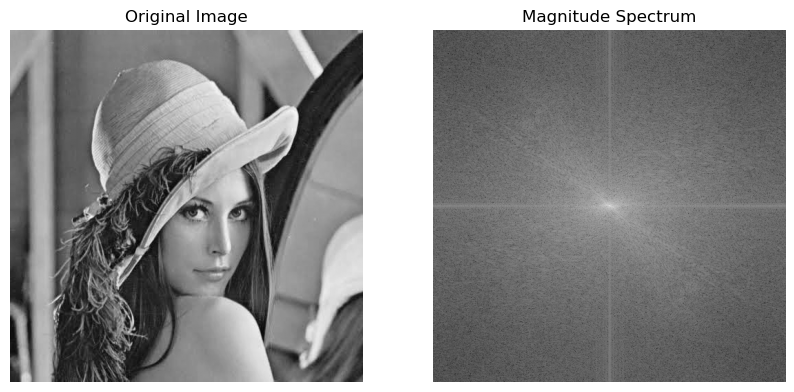

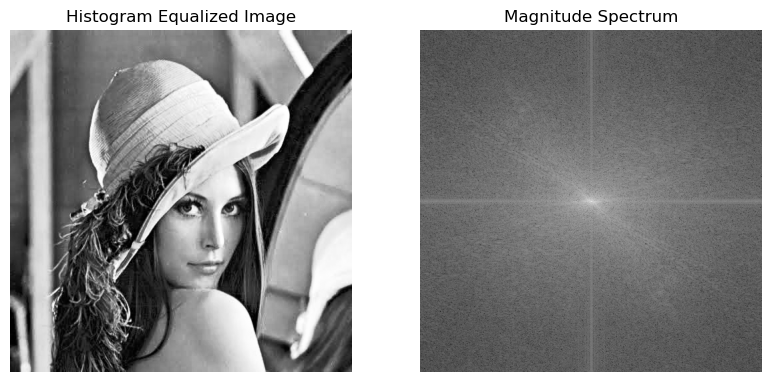

In [3]:
def compute_dft(image_path):
    
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    if image is None:
        print("Error: Could not read the image.")
        return
    
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)
    magnitude_spectrum = 20 * np.log(np.abs(dft_shift))
    
   
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis("off")
    
    plt.subplot(1, 2, 2)
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title("Magnitude Spectrum")
    plt.axis("off")
    
    plt.show()

def compute_histogram_equalised_dft(image_path):
  
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    if image is None:
        print("Error: Could not read the image.")
        return
    
    equalized_image = cv2.equalizeHist(image)
    
    dft = np.fft.fft2(equalized_image)
    dft_shift = np.fft.fftshift(dft)
    magnitude_spectrum = 20 * np.log(np.abs(dft_shift))
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.imshow(equalized_image, cmap='gray')
    plt.title("Histogram Equalized Image")
    plt.axis("off")
    
    plt.subplot(1, 3, 2)
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title("Magnitude Spectrum")
    plt.axis("off")
    
    plt.show()
image_path=r"D:\XKUT9.png"
compute_dft(image_path)
compute_histogram_equalised_dft(image_path)

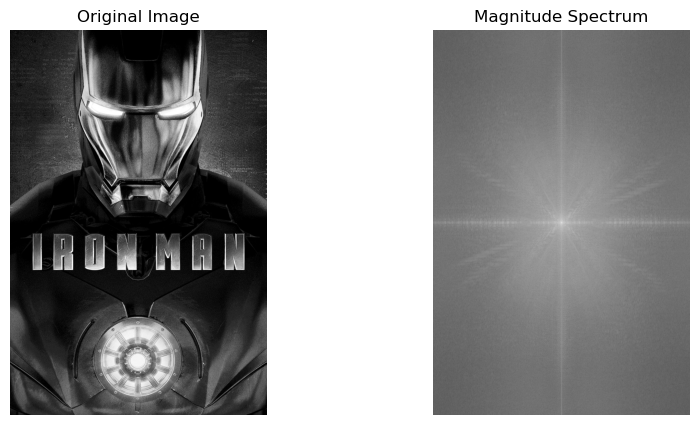

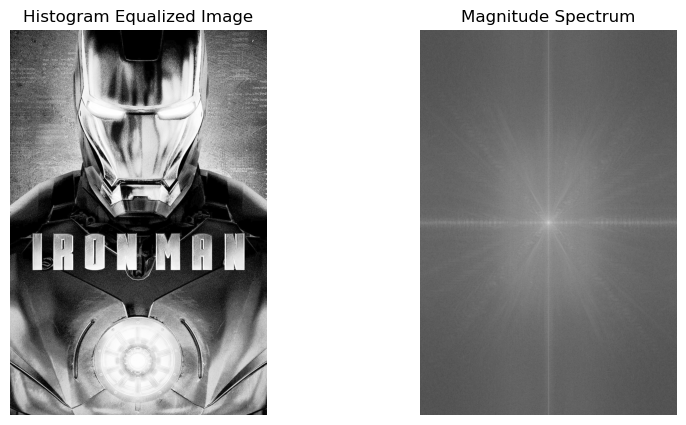

In [4]:
image_path=r"D:\rYy4MShKrZVXhiG4BLqwW1PeSOT.jpg"
compute_dft(image_path)
compute_histogram_equalised_dft(image_path)

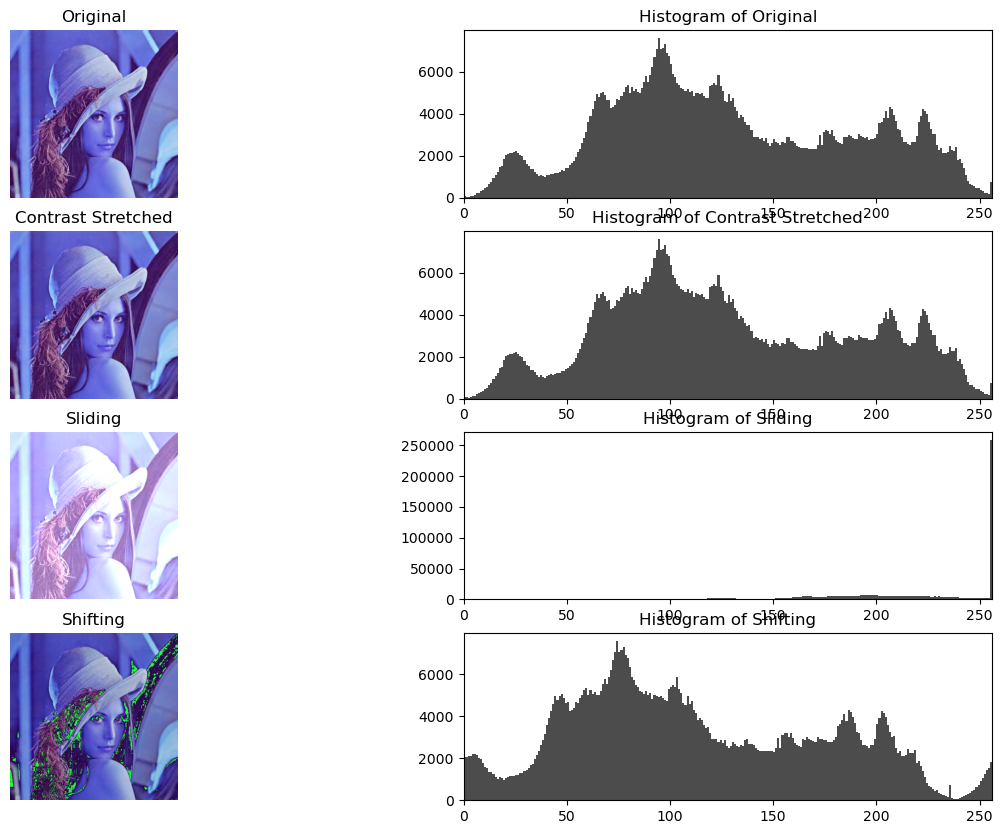

In [16]:
def histogram_processing(image_path):
 
    image = cv2.imread(image_path)
    
    if image is None:
        print("Error: Could not read the image.")
        return
    
   
    min_val, max_val = np.min(image), np.max(image)
    contrast_stretched = cv2.normalize(image,None, 0, 255, cv2.NORM_MINMAX)
    
 
    sliding = cv2.convertScaleAbs(image, alpha=1.0, beta=100)  # Increase brightness by 50
    
   
    shifted = np.clip(image -20, 0, 255).astype(np.uint8)
    
  
    plt.figure(figsize=(15, 10))
    
    images = [image, contrast_stretched, sliding, shifted]
    titles = ["Original", "Contrast Stretched", "Sliding", "Shifting"]
    
    for i in range(4):
        plt.subplot(4, 2, 2 * i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis("off")
        
        plt.subplot(4, 2, 2 * i + 2)
        plt.hist(images[i].ravel(), bins=256, range=[0, 256], color='black', alpha=0.7)
        plt.title(f"Histogram of {titles[i]}")
        plt.xlim([0, 256])
    
    plt.show()
histogram_processing(r"D:\XKUT9.png")    

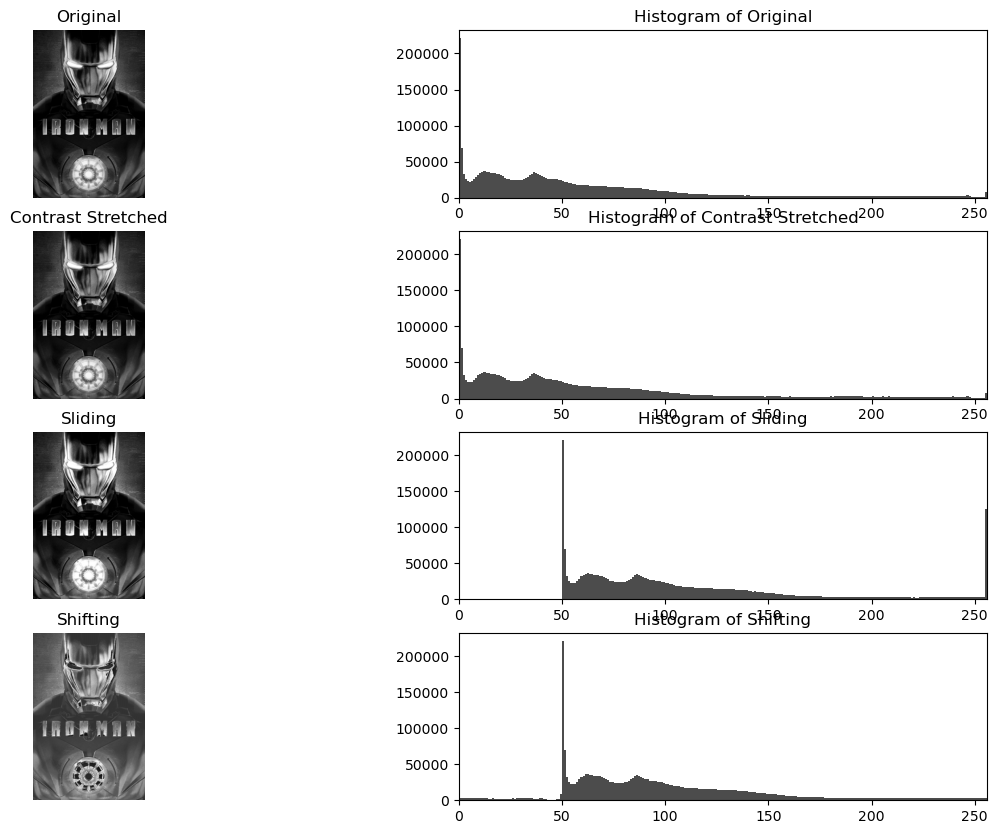

In [6]:
histogram_processing(r"D:\rYy4MShKrZVXhiG4BLqwW1PeSOT.jpg") 

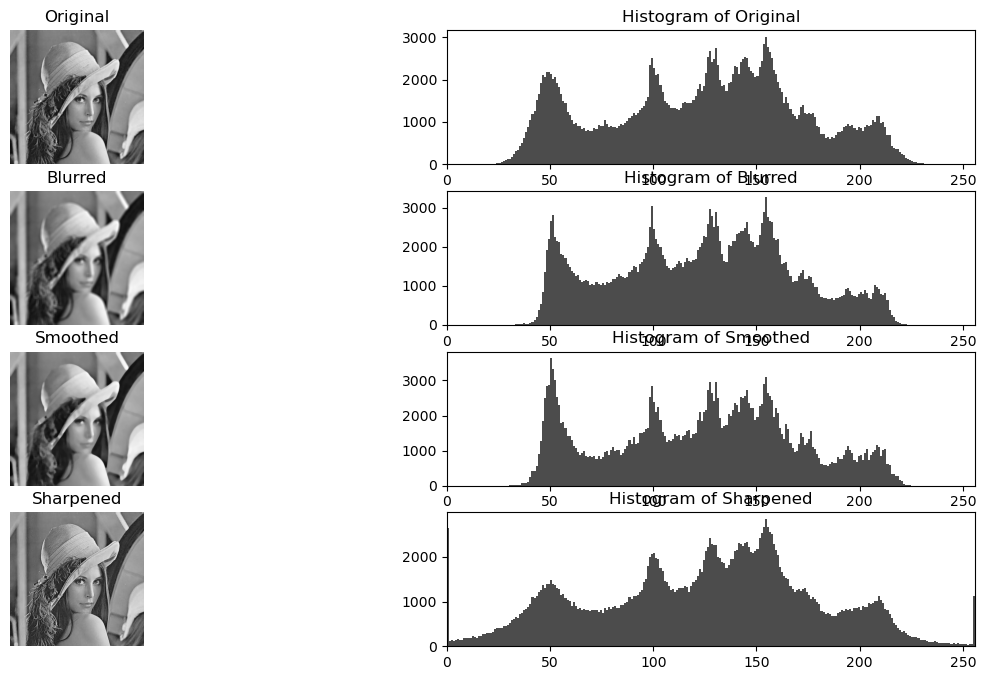

In [37]:
def linear_filtering(image_path):
   
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    if image is None:
        print("Error: Could not read the image.")
        return
    
   
    blurred = cv2.GaussianBlur(image, (11, 11), 100)
    
    
    smoothed = cv2.medianBlur(image,11)
    
 
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    sharpened = cv2.filter2D(image, -1, kernel)
    
   
    plt.figure(figsize=(15, 8))
    
    images = [image, blurred, smoothed, sharpened]
    titles = ["Original", "Blurred", "Smoothed", "Sharpened"]
    
    for i in range(4):
        plt.subplot(4, 2, 2 * i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis("off")
        
        plt.subplot(4, 2, 2 * i + 2)
        plt.hist(images[i].ravel(), bins=256, range=[0, 256], color='black', alpha=0.7)
        plt.title(f"Histogram of {titles[i]}")
        plt.xlim([0, 256])
    
    plt.show()
linear_filtering(r"D:\XKUT9.png")

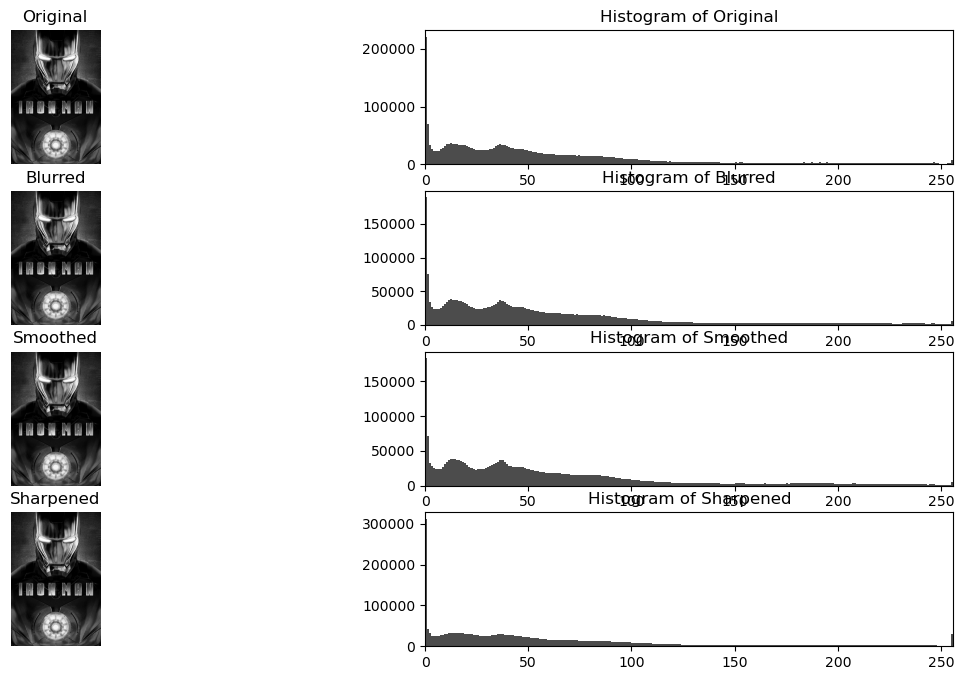

In [8]:
linear_filtering(r"D:\rYy4MShKrZVXhiG4BLqwW1PeSOT.jpg")

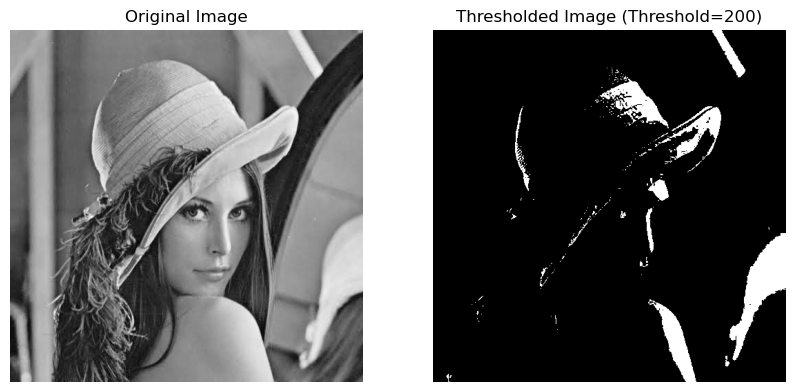

In [51]:
def adjust_threshold(image_path, threshold):
    
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    if image is None:
        print("Error: Could not read the image.")
        return
    
   
    _, thresholded_image = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)
    
   
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis("off")
    
    plt.subplot(1, 2, 2)
    plt.imshow(thresholded_image, cmap='gray')
    plt.title(f"Thresholded Image (Threshold={threshold})")
    plt.axis("off")
    
    plt.show()
adjust_threshold(r"D:\XKUT9.png",200)

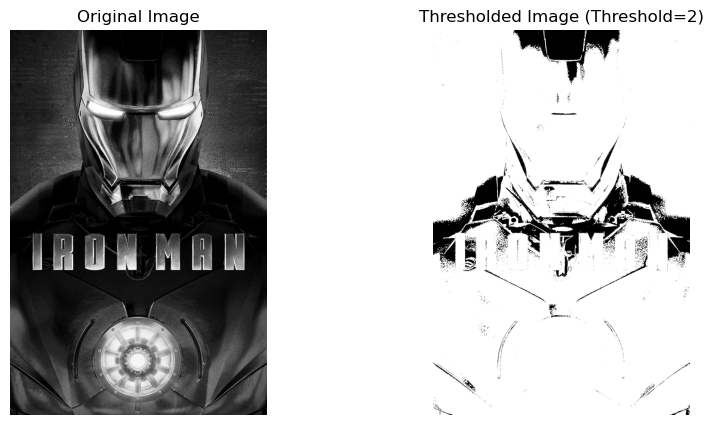

In [47]:
adjust_threshold(r"D:\rYy4MShKrZVXhiG4BLqwW1PeSOT.jpg",2)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def adjust_threshold(image_path, threshold):

    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    if image is None:
        print("Error: Could not read the image.")
        return
    
    _, thresholded_image = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)
    
    plt.figure(figsize=(12, 6))
    

    plt.subplot(2, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis("off")
    
    plt.subplot(2, 2, 2)
    plt.imshow(thresholded_image, cmap='gray')
    plt.title(f"Thresholded Image (Threshold={threshold})")
    plt.axis("off")
    plt.subplot(2, 2, 3)
    plt.hist(image.ravel(), bins=256, range=[0, 256], color='black', alpha=0.7)
    plt.title("Histogram of Original Image")
    plt.xlim([0, 256])

    plt.subplot(2, 2, 4)
    plt.hist(thresholded_image.ravel(), bins=2, range=[0, 256], color='black', alpha=0.7)
    plt.title(f"Histogram of Thresholded Image (Threshold={threshold})")
    plt.xlim([0, 256])
    
    plt.tight_layout()
    plt.show()


adjust_threshold(r"D:\XKUT9.png", 50)


Error: Could not read the image.


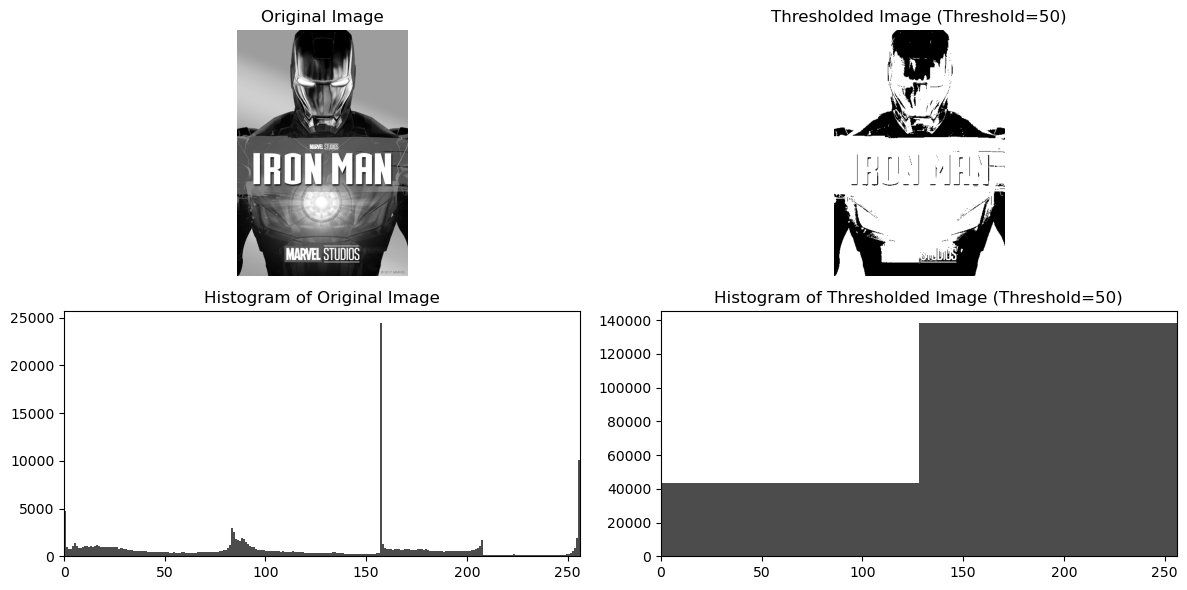

In [3]:
adjust_threshold(r"C:\Users\Nabil\Desktop\sem4\cv\unnamed.jpg",50)